In [1]:
import sys
sys.path.append("..")

from deepvideo import *

/home/caiafa/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Loading data

In [2]:
(X_train, y_train), (X_test, y_test) = get_dataset()

In [3]:
data = VideoLoader(16, input_shape=(1, 244, 244, 3), data_aug=get_augmentations(), label_mapping='../../UCF-101-dataset/Class Index.txt')

In [4]:
data.from_list('../../UCF-101-dataset/UCF-101-jpeg/', (X_train, y_train), (X_test, y_test))

In [ ]:
data.show_frames()

In [ ]:
data.show_videos()

## Building tfrecord dataset

In [ ]:
# data.build_tfrecord_dataset('../tfdataset', 10)

In [5]:
data.use_tfrecord_as_generator('../tfdataset/')

## Defining the model

In [6]:
model = Inception(classes=data.n_classes, input_shape=data.input_shape, weights=None)

## Training

In [7]:
learner = VideoLearner(data, model)

In [8]:
learner.unfreeze()

In [9]:
learner.lr_find(2)

Epoch 1/2
523/595 [=========================>....] - ETA: 30s - loss: 5.0691 - acc: 0.0158

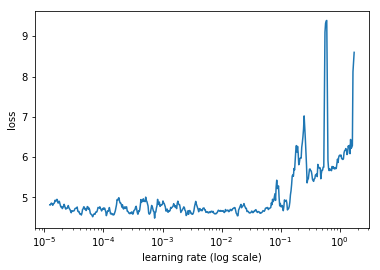

In [10]:
learner.recorder.plot_loss()

In [11]:
learner.fit_one_cycle(10, 0.001)

Epoch 1/10
595/595 [==============================] - 315s 529ms/step - loss: 4.2784 - acc: 0.0675 - val_loss: 4.2659 - val_acc: 0.0755
Epoch 2/10
595/595 [==============================] - 298s 501ms/step - loss: 3.6246 - acc: 0.1528 - val_loss: 3.6879 - val_acc: 0.1666
Epoch 3/10
595/595 [==============================] - 297s 499ms/step - loss: 3.2079 - acc: 0.2275 - val_loss: 3.7525 - val_acc: 0.1653
Epoch 4/10
595/595 [==============================] - 295s 495ms/step - loss: 2.9187 - acc: 0.2806 - val_loss: 3.5797 - val_acc: 0.1947
Epoch 5/10
595/595 [==============================] - 299s 503ms/step - loss: 2.6511 - acc: 0.3429 - val_loss: 3.5826 - val_acc: 0.2166
Epoch 6/10
595/595 [==============================] - 302s 508ms/step - loss: 2.3542 - acc: 0.3998 - val_loss: 3.8935 - val_acc: 0.2060
Epoch 7/10
595/595 [==============================] - 304s 511ms/step - loss: 2.1850 - acc: 0.4435 - val_loss: 3.4835 - val_acc: 0.2513
Epoch 8/10
595/595 [============================

In [12]:
learner.fit_one_cycle(5, 1e-4)

Epoch 1/5
595/595 [==============================] - 322s 541ms/step - loss: 1.2293 - acc: 0.6697 - val_loss: 2.8428 - val_acc: 0.3612
Epoch 2/5
595/595 [==============================] - 298s 501ms/step - loss: 0.9965 - acc: 0.7311 - val_loss: 2.8728 - val_acc: 0.3734
Epoch 3/5
595/595 [==============================] - 287s 482ms/step - loss: 0.8736 - acc: 0.7597 - val_loss: 2.8996 - val_acc: 0.3779
Epoch 4/5
595/595 [==============================] - 295s 495ms/step - loss: 0.8293 - acc: 0.7713 - val_loss: 2.9276 - val_acc: 0.3753
Epoch 5/5
595/595 [==============================] - 311s 523ms/step - loss: 0.7673 - acc: 0.7905 - val_loss: 2.9518 - val_acc: 0.3792


In [13]:
learner.fit_one_cycle(5, 1e-5)

Epoch 1/5
595/595 [==============================] - 311s 522ms/step - loss: 0.6959 - acc: 0.8132 - val_loss: 2.9487 - val_acc: 0.3814
Epoch 2/5
595/595 [==============================] - 297s 499ms/step - loss: 0.6827 - acc: 0.8125 - val_loss: 2.9552 - val_acc: 0.3877
Epoch 3/5
595/595 [==============================] - 281s 473ms/step - loss: 0.6699 - acc: 0.8174 - val_loss: 2.9415 - val_acc: 0.3909
Epoch 4/5
595/595 [==============================] - 280s 470ms/step - loss: 0.6380 - acc: 0.8248 - val_loss: 2.9336 - val_acc: 0.3917
Epoch 5/5
595/595 [==============================] - 287s 482ms/step - loss: 0.6221 - acc: 0.8238 - val_loss: 2.9457 - val_acc: 0.3925


In [14]:
learner.save('../models/rgb/Inception_n_transfer/inception_rgb_1f_39')

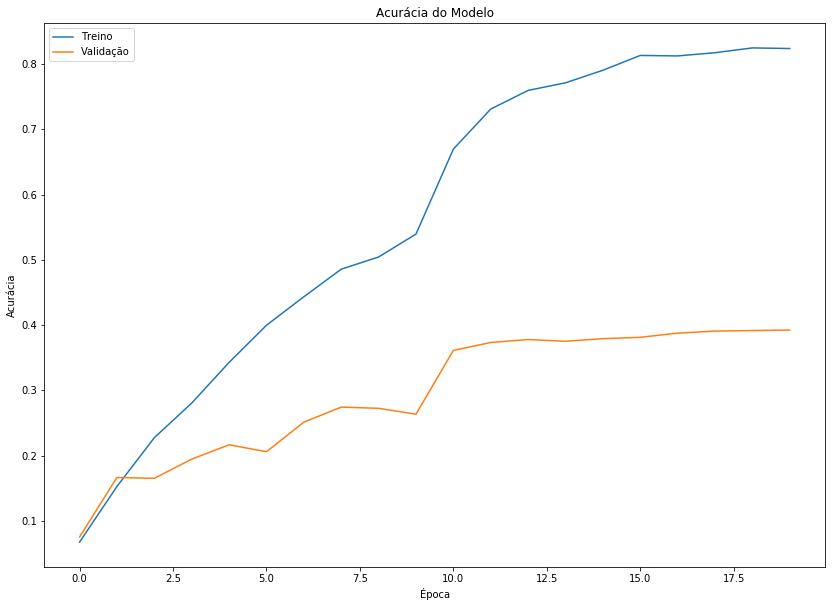

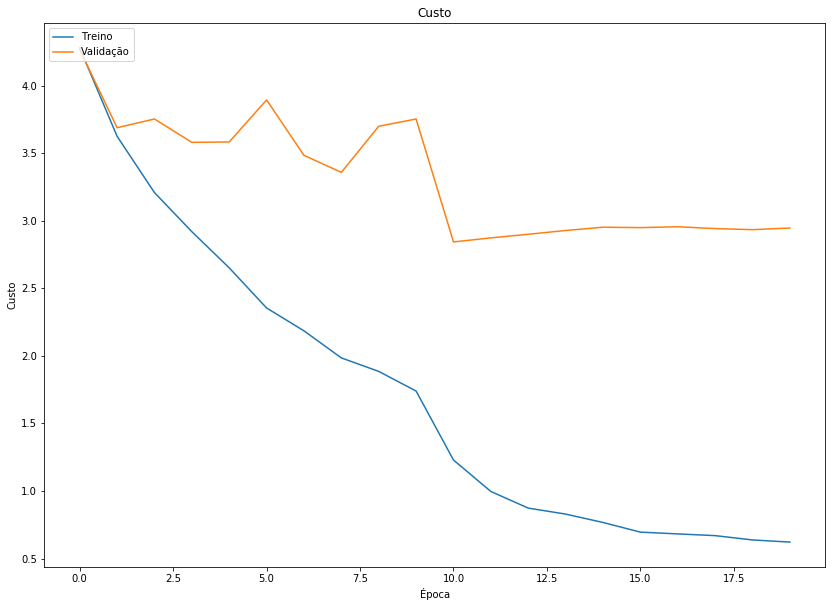

In [15]:
learner.plot_history()

In [16]:
learner.save_report('../models/rgb/Inception_n_transfer/')

In [ ]:
learner.load('../models/rgb/inception/inception_rgb_1f_v2')

## Interpreting

In [ ]:
interp = VideoClassifier(learner, max_frames=128)

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
interp.report()